<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-and-familiarizing-with-the-data" data-toc-modified-id="Reading-and-familiarizing-with-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading and familiarizing with the data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Creating-models." data-toc-modified-id="Creating-models.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating models.</a></span></li><li><span><a href="#Fitting-and-Model-Evaluation" data-toc-modified-id="Fitting-and-Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting and Model Evaluation</a></span></li><li><span><a href="#Conclusions." data-toc-modified-id="Conclusions.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions.</a></span></li><li><span><a href="#Test-of-NN." data-toc-modified-id="Test-of-NN.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test of NN.</a></span></li></ul></div>

# Heart Disease Classification

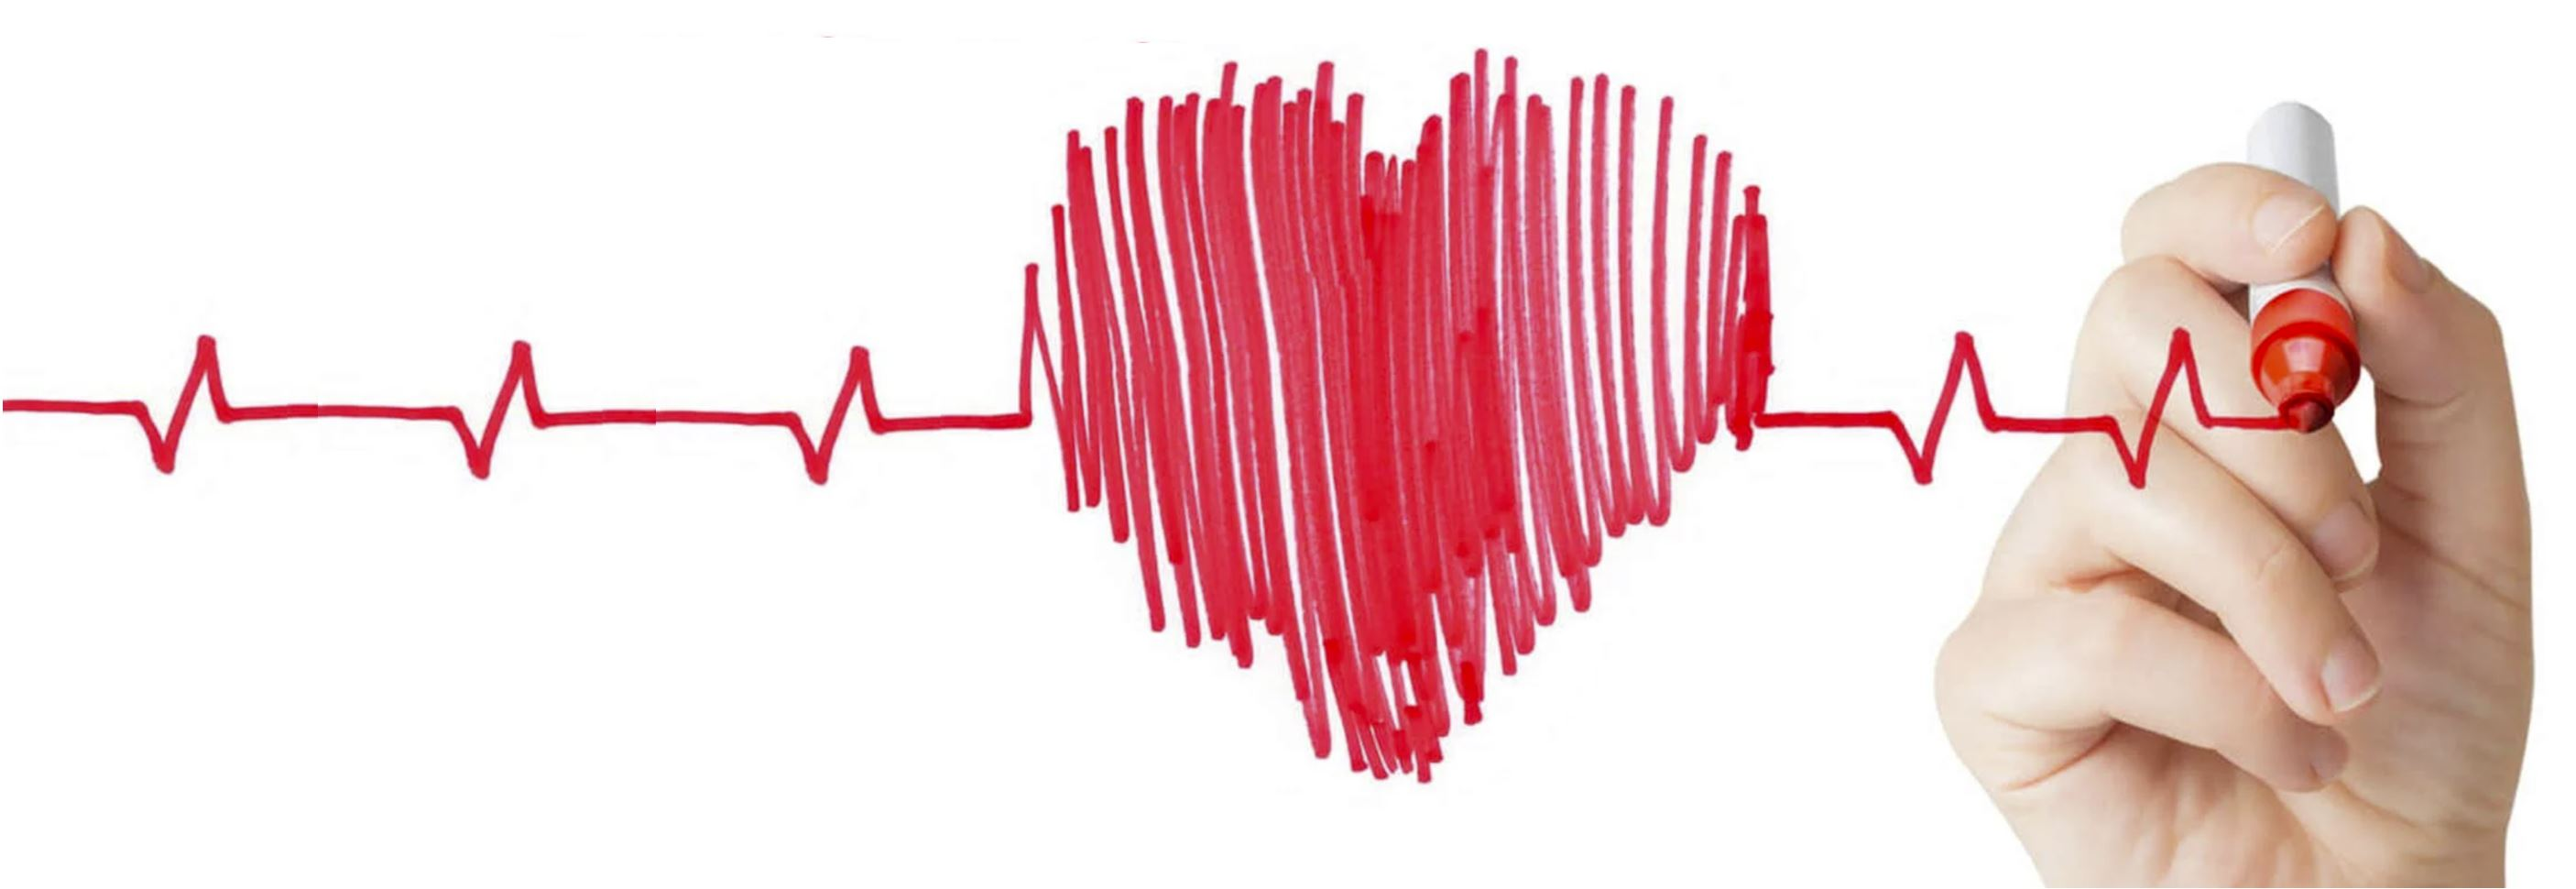

In [1]:
from IPython.display import Image
Image(filename='HeartDisease_pict_v.jpg')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and familiarizing with the data

In [3]:
dataframe = pd.read_csv('HeartDiseaseDataset.csv')
dataframe.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataframe.shape

(303, 14)

In [6]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualization

As can be seen from the pandas_profiling below, we have 9 categorical features, but a more detailed study shows, that 4 of them have a Boolean representation. So categorical values: "cp", "restecg", "slope", "ca", "thal". We will return to them later.

In [8]:
import pandas_profiling as pp
pp.ProfileReport(dataframe)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The HeatMap below shows that the main features correlating with the target are "cp", "thalach" and "slope".

<AxesSubplot:>

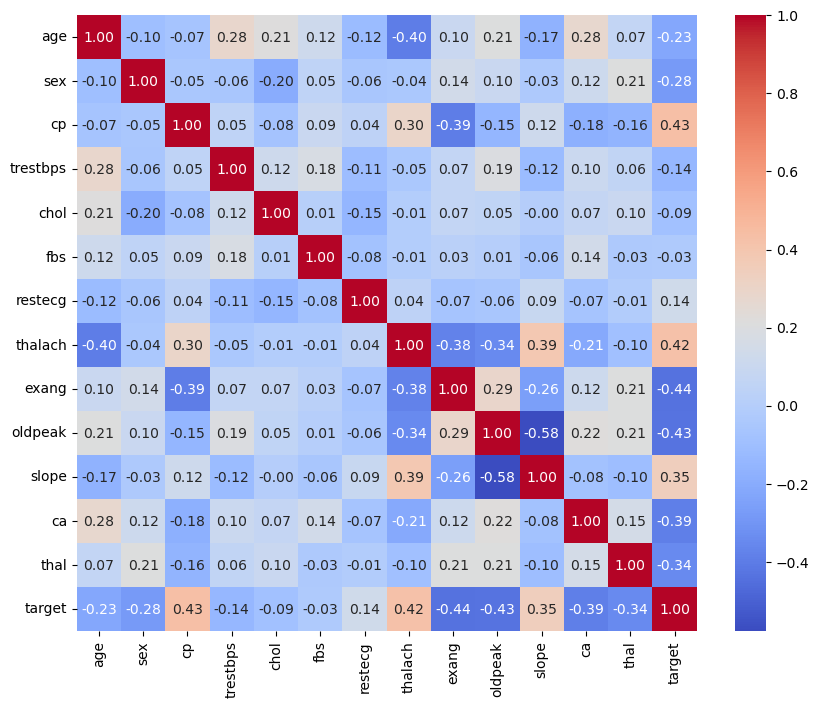

In [9]:
plt.figure(figsize=(10,8))

sns.heatmap(dataframe.corr(),annot=True,cmap=sns.color_palette("coolwarm", as_cmap=True),fmt='.2f')

## Preprocessing

Hypothesis 1: it would be better to divide patients by age groups and apply One Hot Coding

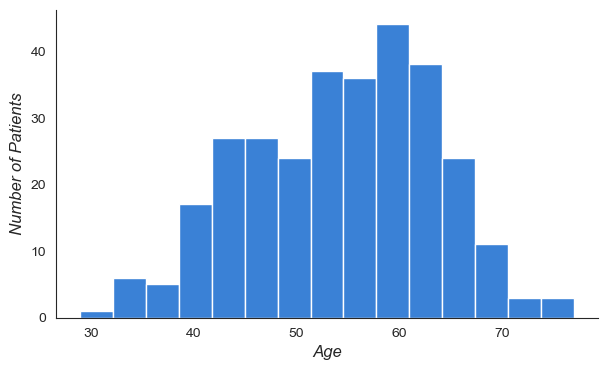

In [10]:
sns.set_style('white')
plt.figure(figsize = (7, 4))
plt.hist(dataframe['age'], bins = 15, color = '#3a81d6')
plt.xlabel('Age',fontsize = 12, fontstyle = 'italic')
plt.ylabel('Number of Patients',fontsize = 12, fontstyle = 'italic')
sns.despine()
plt.show()

In [11]:
df = dataframe.copy()

In [12]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [13]:
sorted(df['age'].unique())

[29,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77]

In [14]:
age_dummies = pd.get_dummies(df['age'], drop_first = True)

In [15]:
age_less_40 = age_dummies.loc[:, :39].max(axis=1);
ade_40_49 = age_dummies.loc[:, 40:49].max(axis=1);
age_50_59 = age_dummies.loc[:, 50:59].max(axis=1);
age_60_69 = age_dummies.loc[:, 60:69].max(axis=1);
age_more_70 = age_dummies.loc[:, 70:].max(axis=1)

In [16]:
df = pd.concat([df, age_less_40, ade_40_49, age_50_59, age_60_69, age_more_70], axis=1)

In [17]:
df = df.drop(['age'], axis=1)

In [18]:
df.columns.values

array(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 0, 1, 2, 3, 4],
      dtype=object)

In [19]:
rename = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_less_40', 'ade_40_49', 'age_50_59', 'age_60_69', 'age_more_70']

In [20]:
df.columns = rename
df.head(3)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_less_40,ade_40_49,age_50_59,age_60_69,age_more_70
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,0,0
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0


Hypothesis 2: for 3 categorical features ("slope", restecg", "cp") I decided to apply One Hot Coding

In [21]:
cp_dummies = pd.get_dummies(df['cp'], drop_first=True)

In [22]:
df=pd.concat([df, cp_dummies], axis=1)
df.columns.values

array(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_less_40',
       'ade_40_49', 'age_50_59', 'age_60_69', 'age_more_70', 1, 2, 3],
      dtype=object)

In [23]:
rename1 = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_less_40',
       'ade_40_49', 'age_50_59', 'age_60_69', 'age_more_70', 'atypical_angina', 'n_anginal_pain', 'asymptomatic']

In [24]:
df.columns = rename1

In [25]:
df = df.drop(['cp'], axis=1)

In [26]:
restecg_dummies = pd.get_dummies(df['restecg'], drop_first=True)
df = pd.concat([df, restecg_dummies], axis=1)
df = df.drop(['restecg'], axis=1)
df.columns.values

array(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'age_less_40', 'ade_40_49',
       'age_50_59', 'age_60_69', 'age_more_70', 'atypical_angina',
       'n_anginal_pain', 'asymptomatic', 1, 2], dtype=object)

In [27]:
rename2 = ['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'age_less_40', 'ade_40_49',
       'age_50_59', 'age_60_69', 'age_more_70', 'atypical_angina',
       'n_anginal_pain', 'asymptomatic', 'ecg_warning', 'ecg_alarm']
df.columns = rename2

In [28]:
slope_dummies = pd.get_dummies(df['slope'], drop_first=True)
df = pd.concat([df, slope_dummies], axis=1)
df = df.drop(['slope'], axis=1)
df.columns.values

array(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'target', 'age_less_40', 'ade_40_49', 'age_50_59',
       'age_60_69', 'age_more_70', 'atypical_angina', 'n_anginal_pain',
       'asymptomatic', 'ecg_warning', 'ecg_alarm', 1, 2], dtype=object)

In [29]:
rename3 = ['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'thal', 'target', 'age_less_40', 'ade_40_49', 'age_50_59',
       'age_60_69', 'age_more_70', 'atypical_angina', 'n_anginal_pain',
       'asymptomatic', 'ecg_warning', 'ecg_alarm', 'flat', 'downsloping']
df.columns = rename3

Hypothesis 3. According to the description, the feature "thal" should have 3 values. However, in the dataset it has 4. In addition, one value is mentioned only 2 times (visualization below).
I believe it would be better to remove these 2 values and apply to the remaining One Hot Coding.

In [30]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [31]:
df.index[df['thal']== 0].tolist()

[48, 281]

In [32]:
#pd.options.display.max_columns = None     # JUST FOR CHECKING THAT ALL CORRECT
#pd.options.display.max_rows = None
#display(df['thal'])

In [33]:
df = df.drop([48], axis = 0)
df = df.drop([281], axis = 0)

In [34]:
thal_dummies = pd.get_dummies(df['thal'], drop_first=True)
df = pd.concat([df, thal_dummies], axis=1)
df = df.drop(['thal'], axis=1)
df.columns.values

array(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'age_less_40', 'ade_40_49', 'age_50_59',
       'age_60_69', 'age_more_70', 'atypical_angina', 'n_anginal_pain',
       'asymptomatic', 'ecg_warning', 'ecg_alarm', 'flat', 'downsloping',
       2, 3], dtype=object)

In [35]:
rename4 = ['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'age_less_40', 'ade_40_49', 'age_50_59',
       'age_60_69', 'age_more_70', 'atypical_angina', 'n_anginal_pain',
       'asymptomatic', 'ecg_warning', 'ecg_alarm', 'flat', 'downsloping',
       'fixed_defect', 'reversable_defect']
df.columns = rename4

Hypothesis 4. According to the description, the feature "ca": "ca: number of major vessels (0-3) colored by flourosopy",there should be 4 values. However, in the dataset it has 5. In addition, one value is mentioned only 5 times (visualization below). However, I will retain all values and apply to them the One Hot Coding.

In [36]:
df['ca'].value_counts()

0    173
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [37]:
ca_dummies = pd.get_dummies(df['ca'], drop_first=True)
df = pd.concat([df, ca_dummies], axis=1)
df = df.drop(['ca'], axis=1)
df.columns.values

array(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'age_less_40', 'ade_40_49', 'age_50_59', 'age_60_69',
       'age_more_70', 'atypical_angina', 'n_anginal_pain', 'asymptomatic',
       'ecg_warning', 'ecg_alarm', 'flat', 'downsloping', 'fixed_defect',
       'reversable_defect', 1, 2, 3, 4], dtype=object)

In [38]:
rename5 = ['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'age_less_40', 'ade_40_49', 'age_50_59', 'age_60_69',
       'age_more_70', 'atypical_angina', 'n_anginal_pain', 'asymptomatic',
       'ecg_warning', 'ecg_alarm', 'flat', 'downsloping', 'fixed_defect',
       'reversable_defect', 'ca_1', 'ca_2', 'ca_3', 'ca_4']
df.columns = rename5

Finaly, because we have 4 numeric features, I'm going to apply the Scaler (further).

## Creating models.

In [39]:
df.head(3)

,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,age_less_40,ade_40_49,...,ecg_warning,ecg_alarm,flat,downsloping,fixed_defect,reversable_defect,ca_1,ca_2,ca_3,ca_4
0,1,145,233,1,150,0,2.3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,130,250,0,187,0,3.5,1,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0,130,204,0,172,0,1.4,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [40]:
df1 = df.copy()

In [41]:
x_data  = df1.drop('target',axis=1)
y = df1['target']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,shuffle=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
SVC_linear = SVC(kernel='linear')
KNeighbors = KNeighborsClassifier()
SVC_poly = SVC(kernel='poly')
LogisticRegression = LogisticRegression()

## Fitting and Model Evaluation

Model: DecisionTreeClassifier() 
Test Accuracy : 74.73%  


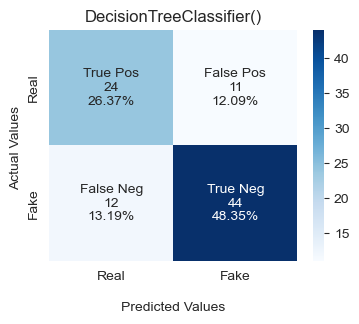

________________________________________
    
    
Model: RandomForestClassifier() 
Test Accuracy : 76.92%  


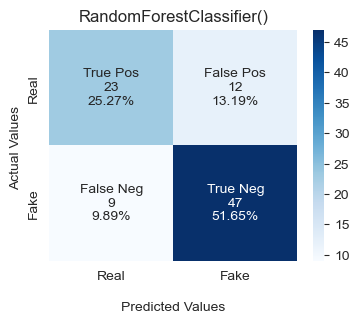

________________________________________
    
    
Model: SVC(kernel='linear') 
Test Accuracy : 83.52%  


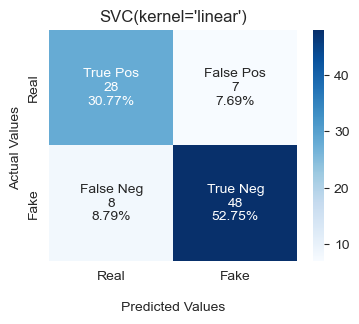

________________________________________
    
    
Model: KNeighborsClassifier() 
Test Accuracy : 82.42%  


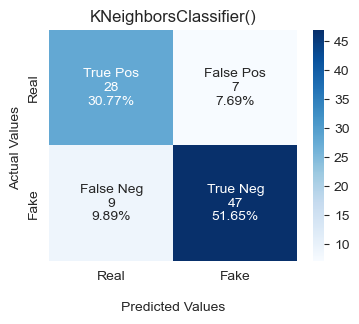

________________________________________
    
    
Model: SVC(kernel='poly') 
Test Accuracy : 84.62%  


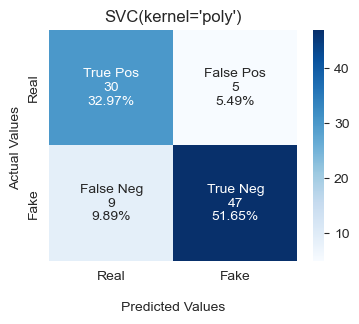

________________________________________
    
    
Model: LogisticRegression() 
Test Accuracy : 87.91%  


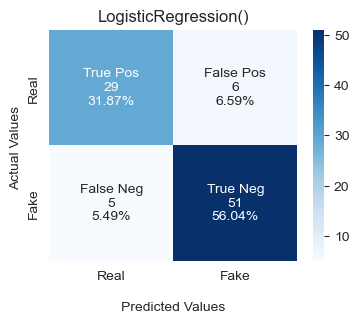

________________________________________
    
    


In [45]:
models = [DecisionTree,
         RandomForest,
         SVC_linear,
         KNeighbors,
         SVC_poly,
         LogisticRegression
         ]
accuracy_test = []
model = []
for m in models:
    m.fit(X_train,y_train)
    prediction = m.predict(X_test)
    Acc_test = m.score(X_test, y_test)
    print('Model:\033[07m {} \033[0m'.format(m))
    print('Test Accuracy :\033[32m \033[01m{:.2f}% \033[30m \033[0m'.format(Acc_test * 100))
    
    
    cf_matrix = confusion_matrix(y_test, prediction)
    group_names = ['True Pos','False Pos','False Neg','True Neg']

    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(4,3))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="Blues")

    ax.set_title(m);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Real','Fake'])
    ax.yaxis.set_ticklabels(['Real','Fake'])
    plt.show()
    
    accuracy_test += [Acc_test * 100]
    model += [m]
    
    print('''________________________________________
    
    ''')

In [46]:
model = pd.Series(model, name='Model').astype(str)
ass_test = pd.Series(accuracy_test, name='Accuracy')
output = pd.concat([model, ass_test], axis=1)

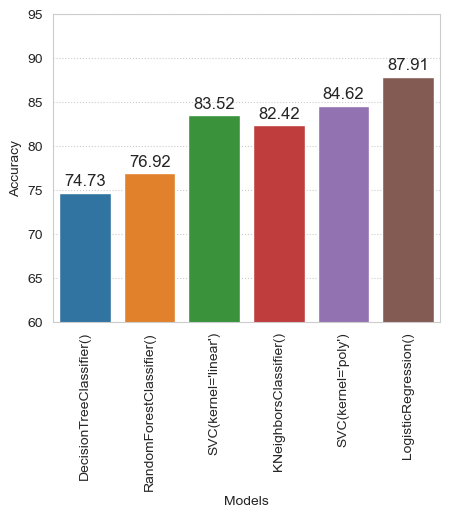

In [47]:
sns.set_style('whitegrid', {'grid.color': '#cccccc', 'grid.linestyle': ':'})
plt.figure(figsize=(5,4))
plots = sns.barplot(data=output, x='Model', y='Accuracy')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(60,95)
plt.xticks(rotation=90)
plt.show()

## Conclusions.

Models "RandomForest" and "LogisticRegression" show the highest accuracy.
BUT "RandomForest" gives fewer false negative results. Therefore, the "RandomForest" wins.

## Test of NN.

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [52]:
model1 = Sequential([
    Dense(13, input_shape = (25,), activation = 'relu'),
    Dense(13, activation = 'relu'),
    Dense(7, activation = 'relu'),
    #Dense(21, activation = 'relu'),
    #Dense(12, activation = 'relu'),
    Dense(3, activation = 'relu'),
    #Dense(2, activation = 'sigmoid'),
    Dense(2, activation = 'softmax')
])

In [53]:
model1.compile(Adam(learning_rate = .001),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [57]:
result = model1.fit(X_train, y_train, validation_split = 0.20, batch_size = 12, epochs = 100, shuffle = True, verbose = 2)

Epoch 1/100
14/14 - 0s - loss: 0.0428 - accuracy: 0.9821 - val_loss: 0.4217 - val_accuracy: 0.8810 - 142ms/epoch - 10ms/step
Epoch 2/100
14/14 - 0s - loss: 0.0430 - accuracy: 0.9821 - val_loss: 0.4287 - val_accuracy: 0.8810 - 57ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 0.0423 - accuracy: 0.9821 - val_loss: 0.4334 - val_accuracy: 0.8810 - 63ms/epoch - 5ms/step
Epoch 4/100
14/14 - 0s - loss: 0.0419 - accuracy: 0.9821 - val_loss: 0.4390 - val_accuracy: 0.8810 - 54ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 0.0416 - accuracy: 0.9821 - val_loss: 0.4507 - val_accuracy: 0.8810 - 53ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0397 - accuracy: 0.9821 - val_loss: 0.4467 - val_accuracy: 0.8810 - 53ms/epoch - 4ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0386 - accuracy: 0.9821 - val_loss: 0.4590 - val_accuracy: 0.8810 - 54ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 0.0425 - accuracy: 0.9821 - val_loss: 0.4558 - val_accuracy: 0.8810 - 53ms/epoch - 4ms/step
Epoch 9/100
14

Epoch 68/100
14/14 - 0s - loss: 0.0283 - accuracy: 0.9821 - val_loss: 0.5746 - val_accuracy: 0.8810 - 54ms/epoch - 4ms/step
Epoch 69/100
14/14 - 0s - loss: 0.0299 - accuracy: 0.9821 - val_loss: 0.5793 - val_accuracy: 0.8810 - 55ms/epoch - 4ms/step
Epoch 70/100
14/14 - 0s - loss: 0.0277 - accuracy: 0.9821 - val_loss: 0.5784 - val_accuracy: 0.8810 - 66ms/epoch - 5ms/step
Epoch 71/100
14/14 - 0s - loss: 0.0266 - accuracy: 0.9821 - val_loss: 0.5853 - val_accuracy: 0.8810 - 80ms/epoch - 6ms/step
Epoch 72/100
14/14 - 0s - loss: 0.0304 - accuracy: 0.9821 - val_loss: 0.5750 - val_accuracy: 0.8810 - 78ms/epoch - 6ms/step
Epoch 73/100
14/14 - 0s - loss: 0.0260 - accuracy: 0.9821 - val_loss: 0.5824 - val_accuracy: 0.8810 - 91ms/epoch - 7ms/step
Epoch 74/100
14/14 - 0s - loss: 0.0291 - accuracy: 0.9821 - val_loss: 0.5736 - val_accuracy: 0.8810 - 82ms/epoch - 6ms/step
Epoch 75/100
14/14 - 0s - loss: 0.0268 - accuracy: 0.9821 - val_loss: 0.5601 - val_accuracy: 0.8810 - 88ms/epoch - 6ms/step
Epoch 76

Accuracy is worse

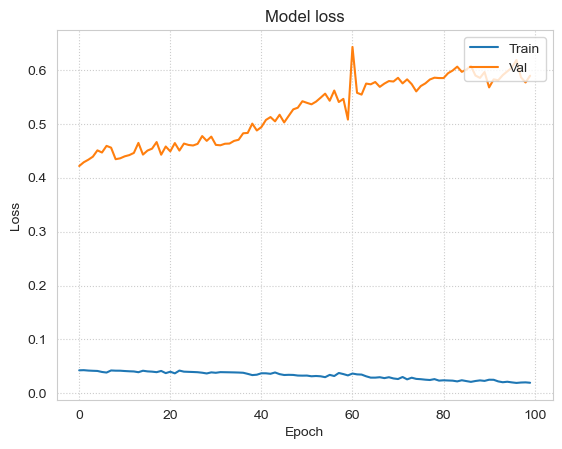

In [58]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

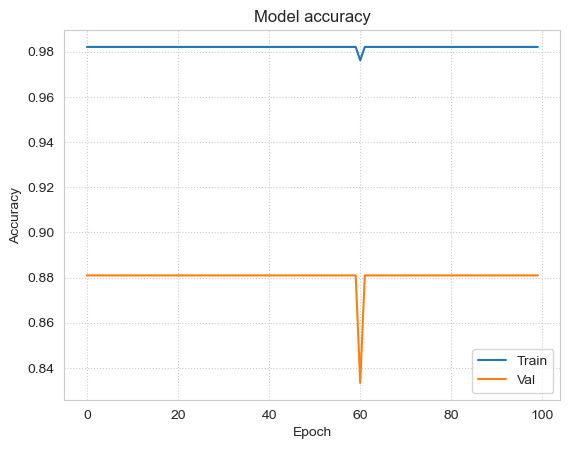

In [59]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()